<a href="https://colab.research.google.com/github/VimarshaVi/123/blob/master/18001785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [70]:
import pandas as pd

In [106]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [72]:
data.shape

(299, 13)

In [73]:
data = normalize(data, axis=0)

In [75]:
X = data[:, 0:12]
Y = data[:, 12:]

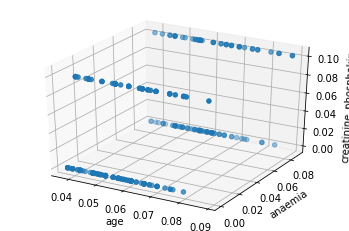

In [103]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y

ax.scatter(xs, ys, zs)

ax.set_xlabel('age')
ax.set_ylabel('anaemia')
ax.set_zlabel('creatinine_phosphokinase')

plt.show()



In [78]:
learning_rate = 0.09
max_iteration = 500

In [79]:
s_learning_rate = 0.06
s_max_iteration = 500

In [80]:
mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

In [115]:
theta = np.zeros((data.shape[1], 1))
s_theta = np.zeros((data.shape[1], 1))
mb_theta = np.zeros((data.shape[1], 1))

In [117]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [119]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

In [120]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [121]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [123]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [124]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [125]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.001577685025738188
iteration :  100  loss :  0.0011273038788613022
iteration :  200  loss :  0.0011192691008204375
iteration :  300  loss :  0.0011114141459076569
iteration :  400  loss :  0.0011037343014266418


In [126]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.001596717094955962
iteration :  100  loss :  0.0009774179503300561
iteration :  200  loss :  0.000805912006224063
iteration :  300  loss :  0.0007394348770245586
iteration :  400  loss :  0.0007114914988646409


In [127]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  0.0012556952545229715
iteration :  100  loss :  0.0010640928602123872
iteration :  200  loss :  0.0009659170619688612
iteration :  300  loss :  0.0008981666173488183
iteration :  400  loss :  0.0008501784463649866


In [128]:
theta

array([[ 0.03236209],
       [ 0.00774972],
       [ 0.00697674],
       [ 0.00728861],
       [ 0.00104094],
       [-0.00802171],
       [ 0.00840876],
       [-0.00035676],
       [ 0.02246925],
       [ 0.00109911],
       [ 0.00112951],
       [-0.00023456],
       [-0.03102058]])

In [129]:
s_theta

array([[ 0.06562858],
       [ 0.39381327],
       [ 0.02148143],
       [ 0.07273439],
       [-0.02052769],
       [-0.58928462],
       [-0.01645003],
       [-0.0491073 ],
       [ 0.25311072],
       [-0.0753194 ],
       [-0.06434239],
       [-0.01942987],
       [-0.5299772 ]])

In [130]:
mb_theta

array([[ 0.03720724],
       [ 0.08779062],
       [ 0.03759693],
       [ 0.05942333],
       [ 0.01021495],
       [-0.16112988],
       [ 0.03535969],
       [-0.02991326],
       [ 0.23800487],
       [-0.01078536],
       [-0.00216722],
       [-0.01001342],
       [-0.38026395]])

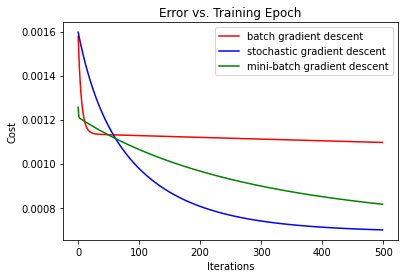

In [131]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

ValueError: ignored

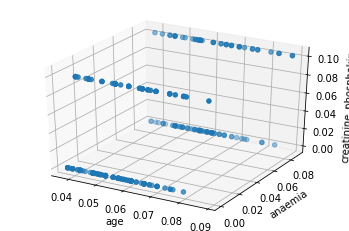

In [132]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('age')
ax.set_ylabel('anaemia')
ax.set_zlabel('creatinine_phosphokinase')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

In [ ]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('Size')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(s_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)
    
plt.show()

ValueError: ignored

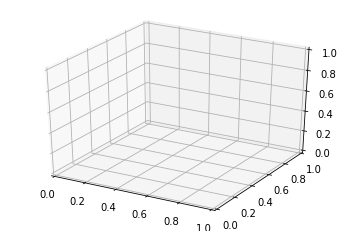

In [105]:
# Fixing random state for reproducibility
# np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([h(mb_theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)
ax.plot_surface(xp, yp, zp, alpha=0.7)

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)


ax.set_xlabel('Size')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price')
    
plt.show()